In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Electronic_PL_sample_database.csv')
start_len = len(df.index)

In [3]:
# Cut extreme cases
df = df[df['price'] > 3]  
df = df[df['price'] < 100]

In [4]:
# Check how many entries were removed
start_len - len(df.index)

246

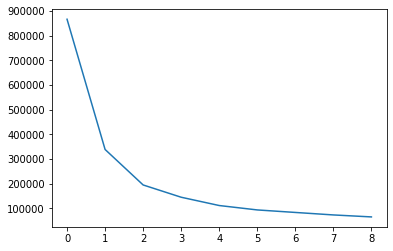

In [5]:
from sklearn.cluster import KMeans


def print_inertia(X):
    inertia = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=1)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.plot(inertia)
    plt.show()

X = np.array(df[['discount', 'price']])
print_inertia(X)

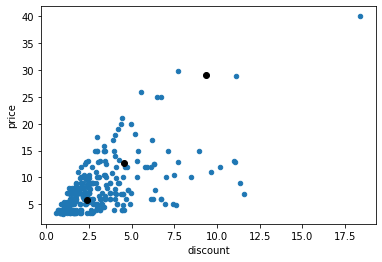

In [6]:
def k_means(df, column_choice, n_clusters=5):
    X = np.array(df[column_choice])
    # print_inertia(X)
    kmeans = KMeans(n_clusters=n_clusters, max_iter=100, n_init=10, random_state=0)
    ymeans = kmeans.fit_predict(X)
    # plt.scatter(X[1], X[2])
    df.plot(x=column_choice[0], y=column_choice[1], kind='scatter')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
    plt.show()

k_means(df[df['bargain_label'] == 'very nice'], ['discount', 'price'], n_clusters=3)

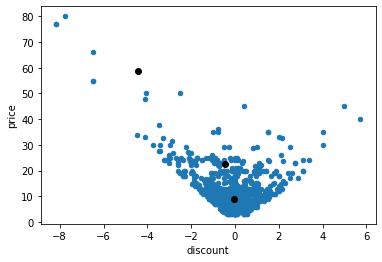

In [7]:
k_means(df[df['bargain_label'] == 'good'], ['discount', 'price'], n_clusters=3)

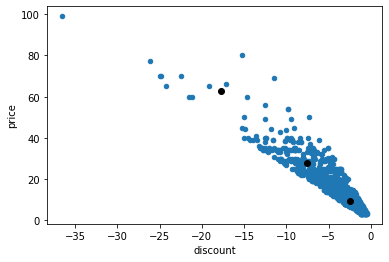

In [8]:
k_means(df[df['bargain_label'] == 'expensive'], ['discount', 'price'], n_clusters=3)

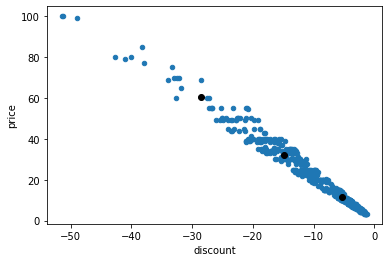

In [9]:
k_means(df[df['bargain_label'] == 'overpriced'], ['discount', 'price'], n_clusters=3)

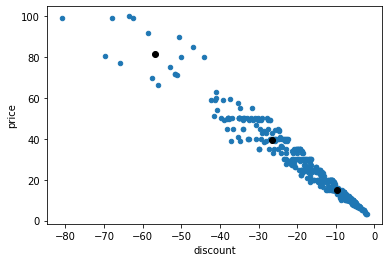

In [10]:
k_means(df[df['bargain_label'] == 'greedy'], ['discount', 'price'], n_clusters=3)

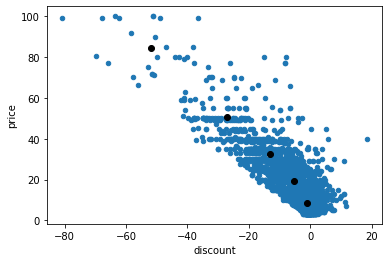

In [11]:
k_means(df, ['discount', 'price'], n_clusters=5)